In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Algorithm(Classifier Libraries)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix



import warnings # used to remove any warning message that might come up
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Renaming the columns/features for better understanding

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar','rest_ecg',
              'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major-vessels', 'thalassemia','target']

df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major-vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major-vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major-vessels          0
thalassemia                0
target                     0
dtype: int64

In [6]:
df[df.duplicated()]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major-vessels,thalassemia,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major-vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
chest_pain_type,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
resting_blood_pressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fasting_blood_sugar,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
rest_ecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
max_heart_rate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exercise_induced_angina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
st_depression,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


## Exploratory Data Analysis

#### UNIVARIATE ANALYSIS

In [10]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major-vessels', 'thalassemia', 'target'],
      dtype='object')

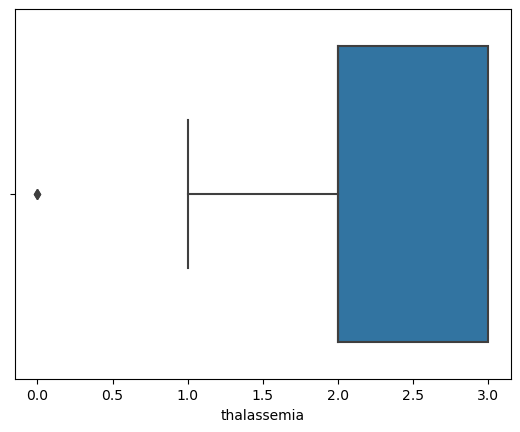

In [11]:
# Checking for outliers

sns.boxplot(x = df['thalassemia']);

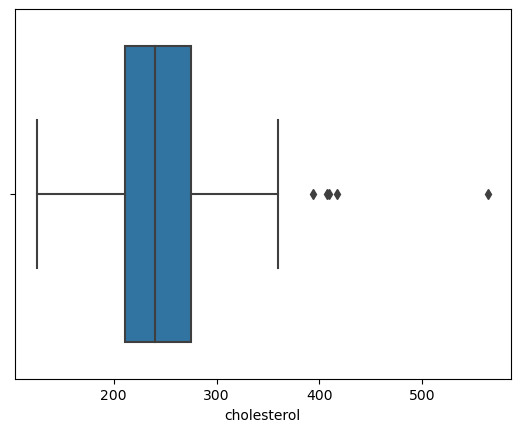

In [12]:
sns.boxplot(x = df['cholesterol']);

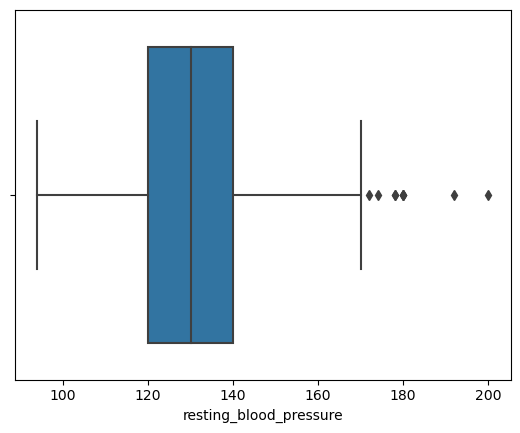

In [13]:
sns.boxplot(x = df['resting_blood_pressure']);

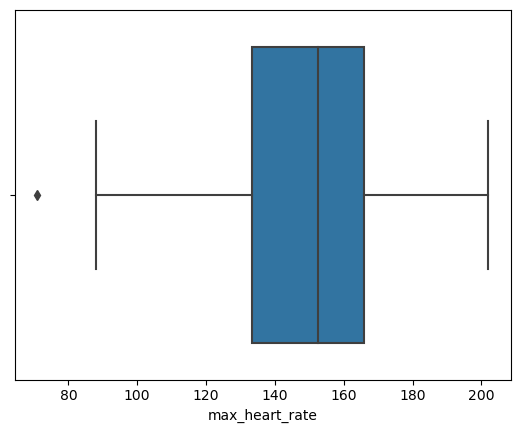

In [14]:
# Checking for outliers

sns.boxplot(x = df['max_heart_rate']);

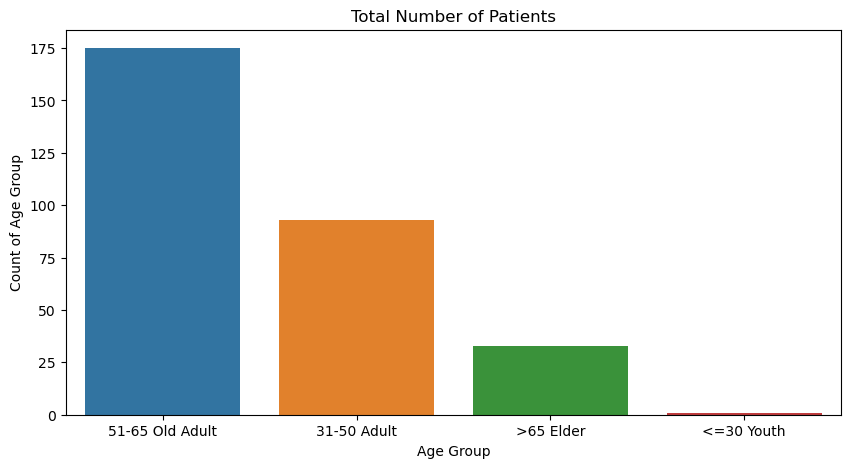

In [15]:
# creating an age bracket in the dataframe for better understanding

def age_bracket(x):
    if x <= 30:
        return '<=30 Youth'
    elif x <= 50:
        return '31-50 Adult'
    elif x <= 65:
        return '51-65 Old Adult'
    else:
        return '>65 Elder'
df['age_bracket'] = df['age'].apply(age_bracket) 

# visualizing the age bracket
plt.figure(figsize = (10,5))
sns.countplot(x = 'age_bracket', data = df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

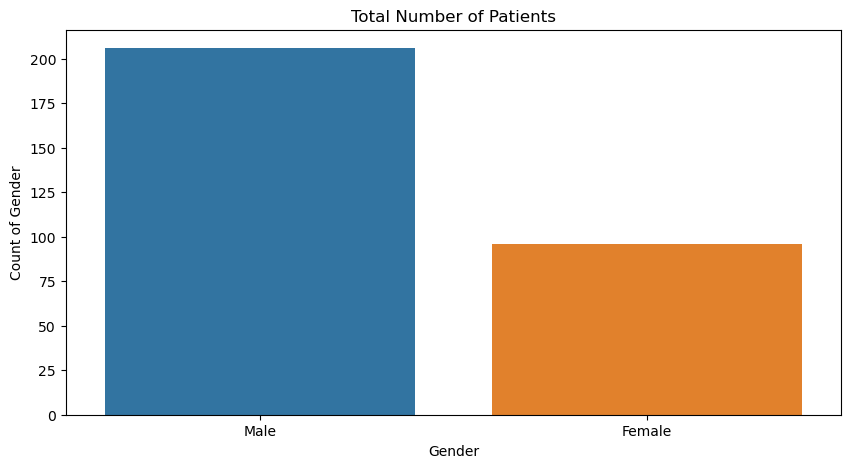

In [16]:
# creating gender column from sex for better understanding

def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

df['gender'] = df['sex'].apply(gender)

# visualizing the gender
plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients');

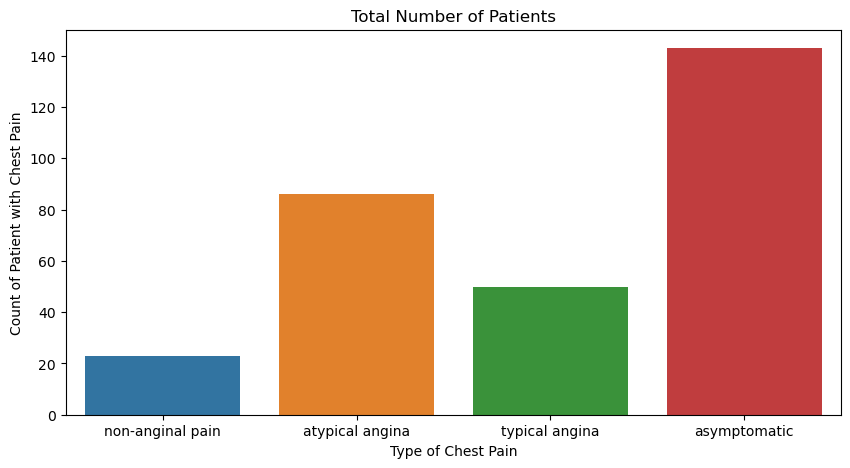

In [17]:
# creating chest pain type column for better understanding

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
    
df['chest_pain_cat'] = df['chest_pain_type'].apply(chest_pain)

# visualizing the chest_pain
plt.figure(figsize = (10,5))
sns.countplot(x = 'chest_pain_cat', data = df)
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Patient with Chest Pain')
plt.title('Total Number of Patients');

Yes    164
No     138
Name: heart_disease, dtype: int64


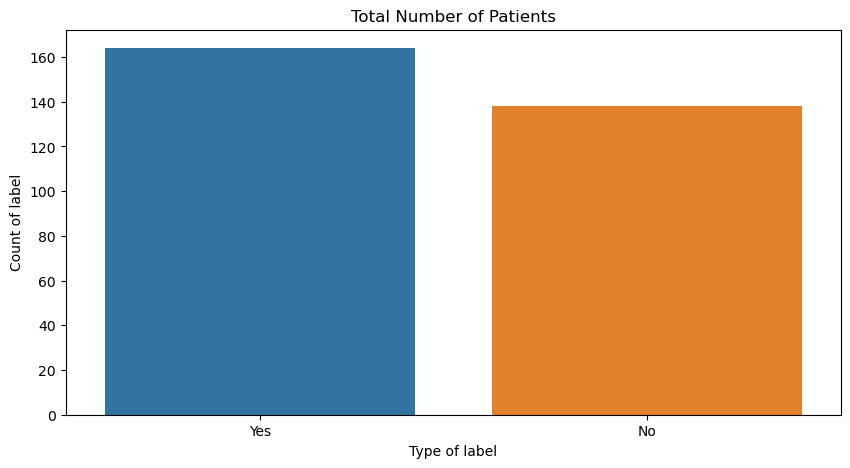

In [18]:
# creating heart disease column for better understanding

def heart_disease(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
    
df['heart_disease'] = df['target'].apply(heart_disease)

#Total number of patient category
print(df['heart_disease'].value_counts())

# visualizing the label
plt.figure(figsize = (10,5))
sns.countplot(x = 'heart_disease', data = df)
plt.xlabel('Type of label')
plt.ylabel('Count of label')
plt.title('Total Number of Patients');

### BIVARIATE ANALYSIS

In [19]:
# What age bracket has more heart disease

age_dis = df.groupby('age_bracket')['heart_disease'].value_counts()
age_dis

age_bracket      heart_disease
31-50 Adult      Yes              64
                 No               29
51-65 Old Adult  No               93
                 Yes              82
<=30 Youth       Yes               1
>65 Elder        Yes              17
                 No               16
Name: heart_disease, dtype: int64

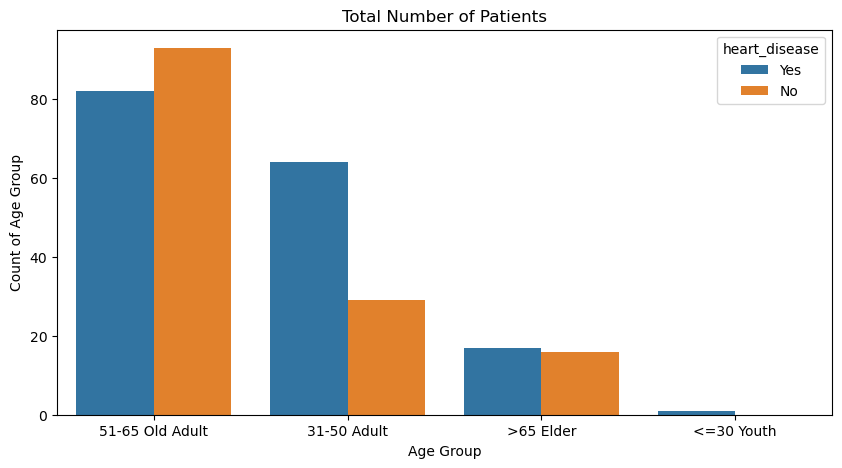

In [20]:
# bivariate analysis on categorical columns

plt.figure(figsize = (10,5))
sns.countplot(x = 'age_bracket', data = df, hue = 'heart_disease')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

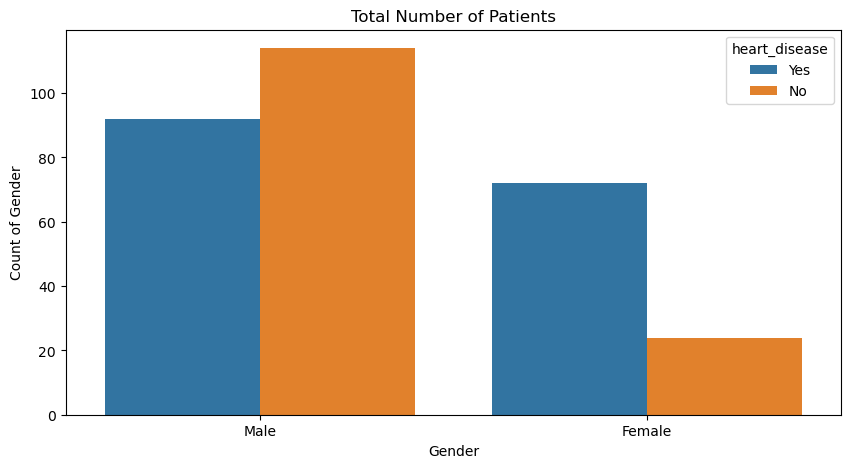

In [21]:
# bivariate analysis on categorical columns

plt.figure(figsize = (10,5))
sns.countplot(x = 'gender', data = df, hue = 'heart_disease')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients');

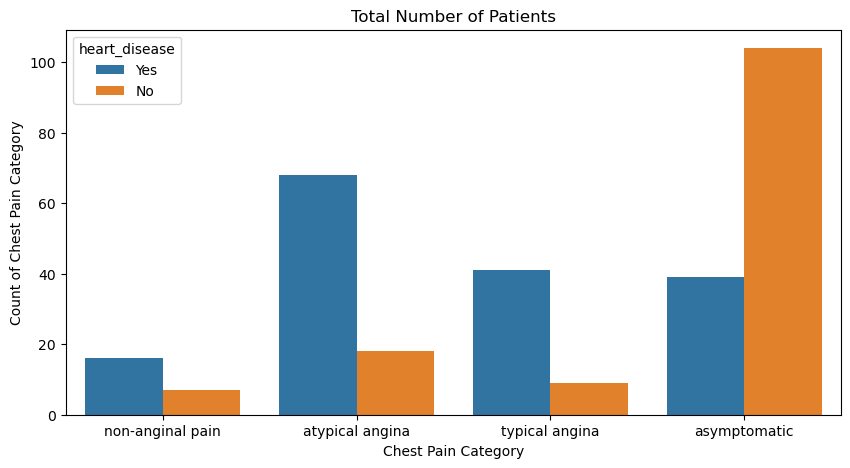

In [22]:
# bivariate analysis on categorical columns

plt.figure(figsize = (10,5))
sns.countplot(x = 'chest_pain_cat', data = df, hue = 'heart_disease')
plt.xlabel('Chest Pain Category')
plt.ylabel('Count of Chest Pain Category')
plt.title('Total Number of Patients');

#### I observed that patient with asymptomatic chest pain type have the least number of patients with heart disease while patient with atypical chest pain type have the highest number of patients with heart disease.

### MULTIVARIATE ANALYSIS

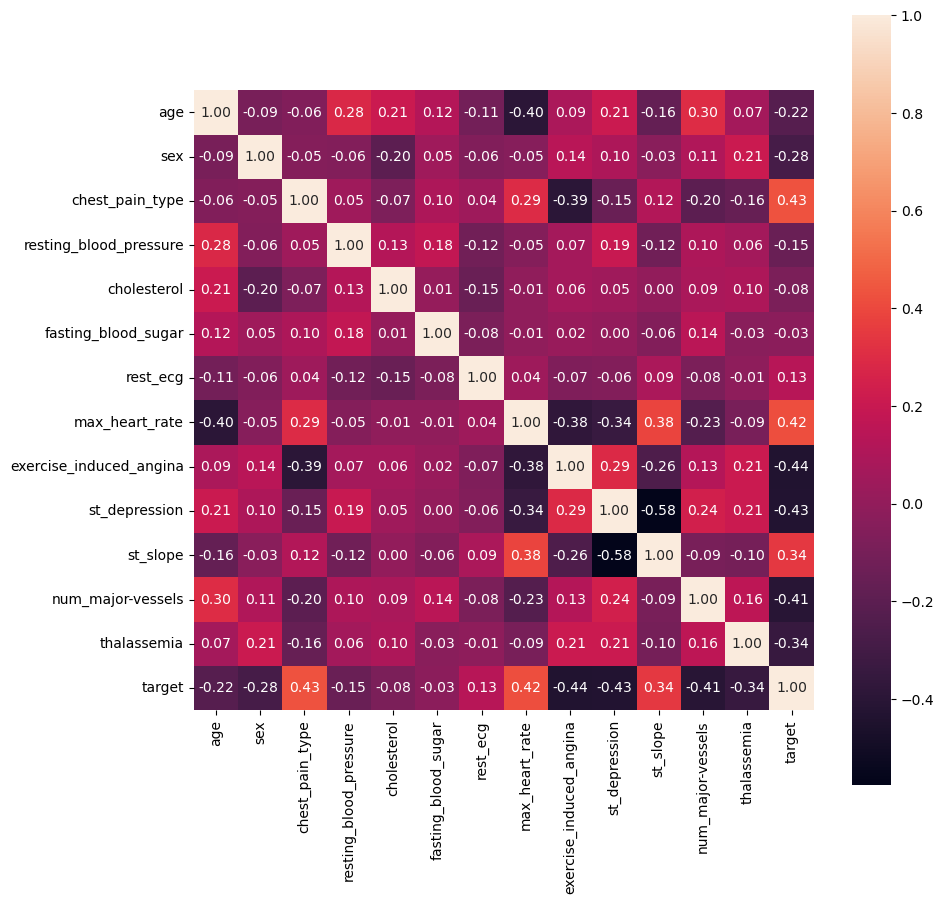

In [23]:
# Correlation between heart disease and other features in the dataset

plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':10}) 

### FEATURE ENGINEERING AND DATA PREPROCESSING

In [24]:
# Creating a copy of the dataframe excluding the columns created,the target and the label

df1 = df.copy()
df1

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major-vessels,thalassemia,target,age_bracket,gender,chest_pain_cat,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,51-65 Old Adult,Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-50 Adult,Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,31-50 Adult,Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-65 Old Adult,Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-65 Old Adult,Female,asymptomatic,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,51-65 Old Adult,Female,asymptomatic,No
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,31-50 Adult,Male,non-anginal pain,No
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,>65 Elder,Male,asymptomatic,No
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,51-65 Old Adult,Male,asymptomatic,No


In [25]:
df1.drop(columns = ['target','age_bracket','gender','chest_pain_cat','heart_disease'],axis = 1, inplace = True)
df1

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major-vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
label = df[['target']]
label

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [27]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major-vessels            int64
thalassemia                  int64
dtype: object

#### It can be observed that there are outliers in the dataset, so the best practice is to reduce the outliers by doing Standardization or Normalization using the MinMaxScaler normalization technique. This technique ensures that all the values lie between 0's and 1's.

In [28]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia','max_heart_rate'

# Normalizing the dataset

scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1['max_heart_rate'].values.reshape(-1,1))

df1.drop(columns = ['resting_blood_pressure', 'cholesterol', 'thalassemia','max_heart_rate'],axis =1, inplace = True)

df1

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major-vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,1,1,0.2,1,0,0.433962,0.262557,1.000000,0.396947
299,45,1,3,0,1,0,1.2,1,0,0.150943,0.315068,1.000000,0.465649
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
301,57,1,0,0,1,1,1.2,1,1,0.339623,0.011416,1.000000,0.335878


### MACHINE LEARNING

In [29]:
# Splitting the dataset into Training and Testing set. Look at X as the question and y as the answer

X_train,X_test,y_train,y_test = train_test_split(df1, label, test_size= 0.2, random_state=42)

In [30]:
# Model Building

# Logistic Regression Algorithm

lr = LogisticRegression() #initialization

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)

# Evaluation Metrics
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:',precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1 Score:', f1_score(y_test, ly_pred))
print('AUC_ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426
AUC_ROC: 0.8545258620689655


#### I observed that the logistic Regression Algorithm used predicted correctly 83% and 17% incorrectly. Accuracy measured the proportion of correctly classified instance in the dataset. Precison measured the proportion of the true positive predictions among all positive predictions. Recall measured the proportion of true positive perdiction among all actual positive instances. F1 Score is the harmonic mean of  the Precision and the Recall.



#### It is best practice to use several Algorithms for prediction(training and testing).

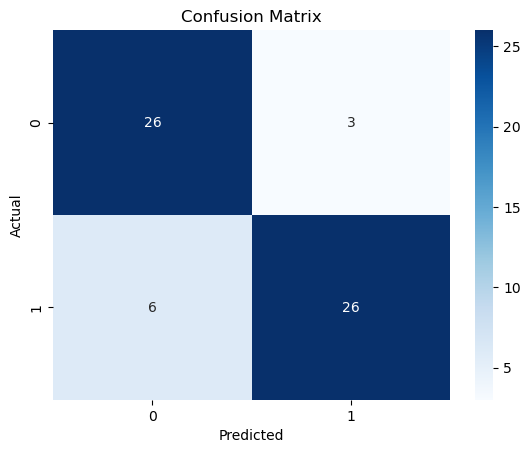

In [31]:
# Creating Confusion Metrics

lcm = confusion_matrix(y_test, ly_pred)

# Visualizing the confusion metrics
sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

#### From the confusion metric evaluation metric, i observed that True Positive(TP) has 26 meaning, 26 people were diagnosed correctly to not having heart disease, False Positive(FP) has 3, meaning 3 people were diagnosed wrongly of having heart disease. False Negative has 6, meaning 6 people were wrongly diagnosed of not having heart disesae whereas they have and lastly True Negative has 26, meaning 26 people were correctly diagnosed of  having heart disease.  

In [32]:
# Model Building

# Random Forest Classifier/ Algorithm

rfc = RandomForestClassifier() #initialization

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

# Evaluation Metrics
print('Random Forest')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:',precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1 Score:', f1_score(y_test, rfy_pred))
print('AUC_ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875
AUC_ROC: 0.8685344827586206


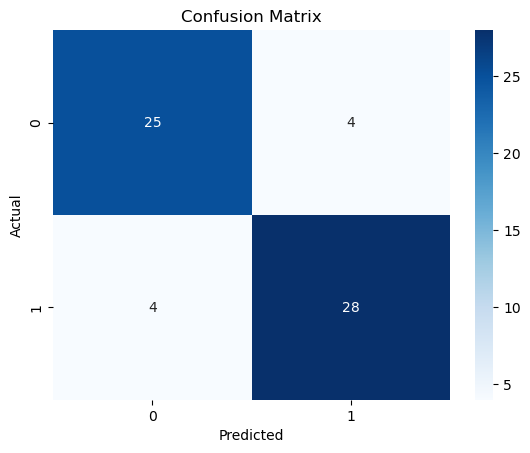

In [33]:
# Creating Confusion Metrics for Randon Forest Classifier

rcm = confusion_matrix(y_test, rfy_pred)

# Visualizing the confusion metrics
sns.heatmap(rcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [34]:
# Model Building

#KNeighborsClassifier/ Algorithm

knc = KNeighborsClassifier() #initialization

knc.fit(X_train, y_train)

kny_pred = knc.predict(X_test)

# Evaluation Metrics
print('KNeighbors')
print('Accuracy:', accuracy_score(y_test, kny_pred))
print('Precision:',precision_score(y_test, kny_pred))
print('Recall:', recall_score(y_test, kny_pred))
print('F1 Score:', f1_score(y_test, kny_pred))
print('AUC_ROC:', roc_auc_score(y_test, kny_pred))

KNeighbors
Accuracy: 0.7868852459016393
Precision: 0.8518518518518519
Recall: 0.71875
F1 Score: 0.7796610169491525
AUC_ROC: 0.7904094827586206


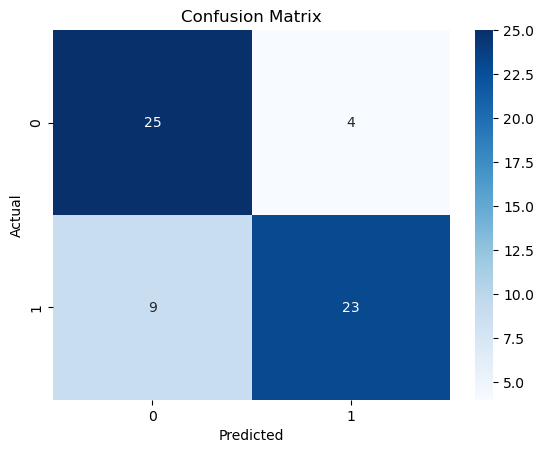

In [35]:
# Creating Confusion Metrics for  KNeighbors Classifier

kcm = confusion_matrix(y_test, kny_pred)

# Visualizing the confusion metrics
sns.heatmap(kcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [36]:
# 8 Machine Learning Algorithm applied at once to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbours'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
              [LogisticRegression(), 'Logistic Regression']
              ]

In [59]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train,y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

In [54]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,85.25%,78.69%,85.25%,72.13%,88.52%,78.69%,85.25%


In [55]:
print('Precisionn Score')
s2 = pd.DataFrame(precision_list)
s2

Precisionn Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,87.1%,85.19%,79.49%,71.43%,93.1%,85.19%,89.66%


In [56]:
print('Recall Score')
s3 = pd.DataFrame(recall_list)
s3

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,84.38%,71.88%,96.88%,78.12%,84.38%,71.88%,81.25%


In [57]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,85.29%,79.04%,84.64%,71.82%,88.74%,79.04%,85.45%
